
# LAB: K-Means Clustering


## Objectives

After completing this lab you will be able to:

*   Use scikit-learn's K-Means Clustering to cluster data


## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

*   Customer segmentation
*   Understand what the visitors of a website are trying to accomplish
*   Pattern recognition
*   Machine learning
*   Data compression

In this notebook we practice k-means clustering with 2 examples:

*   k-means on a random generated dataset
*   Using k-means for customer segmentation


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https://#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="https://#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="https://#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <p></p>
        <li><a href="https://#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="https://#pre_processing">Pre-processing</a></li>
                <li><a href="https://#modeling">Modeling</a></li>
                <li><a href="https://#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


### Import the Libraries

Let's first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.


In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>

Let's create our own dataset for this lab!

First we need to set a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.


In [2]:
np.random.seed(0)

### How Seed Function Works ?
Seed function is used to save the state of a random function, so that it can generate same random numbers on multiple executions of the code on the same machine or on different machines (for a specific seed value). The seed value is the previous value number generated by the generator. For the first time when there is no previous value, it uses current system time. 

### Using random.seed() function
Here we will see how we can generate the same random number every time with the same seed value. 

In [7]:
# random module is imported
import random
for i in range(5):

	# Any number can be used in place of '0'.
	random.seed(0)

	# Generated random number will be between 1 to 1000.
	print(random.randint(0, 1000))
	


864
864
864
864
864


Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br> <b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [9]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [10]:
X.shape
## by default feature in make_blobs is 2

(5000, 2)

In [11]:
y.shape

(5000,)

In [14]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [18]:
X[:,1]

array([ 0.07098024, -2.93199608, -3.26075305, ...,  4.24400152,
       -0.29979681,  0.63035513])

Display the scatter plot of the randomly generated data.


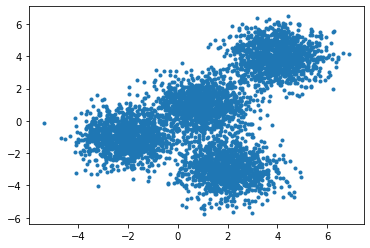

In [13]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [20]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>.


In [21]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>.


In [44]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [ ]:
len(set(k_means_labels[:]))

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers .

In [28]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


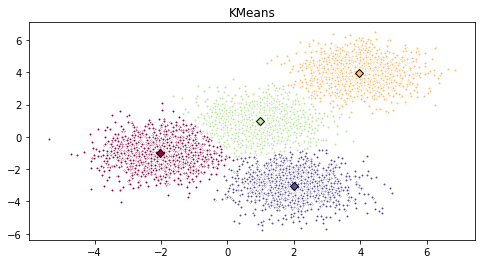

In [59]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(8, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1],'D',markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [56]:
k_means_labels.shape

(5000,)

In [61]:
set(k_means_labels)

{0, 1, 2, 3}

In [59]:
len(set(k_means_labels))

4

In [66]:
df=zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors)

In [67]:
print(tuple(df))

((0, array([0.61960784, 0.00392157, 0.25882353, 1.        ])), (1, array([0.99346405, 0.74771242, 0.43529412, 1.        ])), (2, array([0.74771242, 0.89803922, 0.62745098, 1.        ])), (3, array([0.36862745, 0.30980392, 0.63529412, 1.        ])))





## Practice

Try to cluster the above dataset into 3 clusters.\
Notice: do not generate the data again, use the same dataset as above.


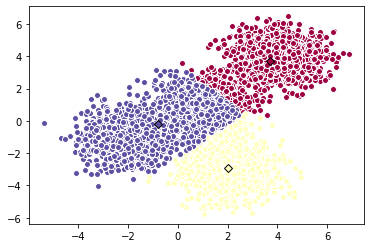

In [70]:
# write your code here
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='o')
    ax.plot(cluster_center[0], cluster_center[1], 'D', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()




<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.


In [69]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv'

### Load Data From CSV File

Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.


In [73]:
filename ="Cust_Segmentation.csv"

we create a pandas dataframe


In [74]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2


As you can see, **Address** in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.


In [75]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### OR instead of dropping, we can perform encoding transformation

In [77]:
dd =cust_df.copy()
dd.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8


In [93]:
np.array(set(dd['Address']))

array({'NBA020', 'NBA014', 'NBA030', 'NBA012', 'NBA029', 'NBA004', 'NBA016', 'NBA019', 'NBA005', 'NBA006', 'NBA024', 'NBA010', 'NBA018', 'NBA011', 'NBA002', 'NBA003', 'NBA000', 'NBA007', 'NBA008', 'NBA021', 'NBA026', 'NBA027', 'NBA023', 'NBA017', 'NBA001', 'NBA031', 'NBA009', 'NBA022', 'NBA034', 'NBA013', 'NBA015', 'NBA025'},
      dtype=object)

In [96]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['NBA001', 'NBA026', 'NBA005', 'NBA010', 'NBA023', 'NBA007',
       'NBA029', 'NBA018', 'NBA002', 'NBA030', 'NBA019', 'NBA022',
       'NBA024', 'NBA013', 'NBA031', 'NBA016', 'NBA020', 'NBA012',
       'NBA000', 'NBA004', 'NBA011', 'NBA008', 'NBA009', 'NBA027',
       'NBA014', 'NBA017', 'NBA006', 'NBA021', 'NBA003', 'NBA025',
       'NBA015', 'NBA034'])
dd['Address'] = le_sex.transform(dd['Address']) 

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,1,6.3
1,2,47,1,26,100,4.582,8.218,0.0,21,12.8
2,3,33,2,10,57,6.111,5.802,1.0,13,20.9
3,4,29,2,4,19,0.681,0.516,0.0,9,6.3
4,5,47,1,31,253,9.308,8.908,0.0,8,7.2


In [98]:
dd.head()

## Here we converted charagotical feature with numerical features

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,1,6.3
1,2,47,1,26,100,4.582,8.218,0.0,21,12.8
2,3,33,2,10,57,6.111,5.802,1.0,13,20.9
3,4,29,2,4,19,0.681,0.516,0.0,9,6.3
4,5,47,1,31,253,9.308,8.908,0.0,8,7.2


#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [99]:
from sklearn.preprocessing import StandardScaler
X = dd.values[:,1:]
X = np.nan_to_num(X)
## numpy.nan_to_num() function is used when we want to replace nan(Not A Number) with zero 
## and inf with finite numbers in an array. 
## It returns (positive) infinity with a very large number and negative infinity with a very small (or negative) number.
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.52379654,
        -1.072784  , -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.52379654,
         1.84099264,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.90913822,
         0.67548198,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.90913822,
        -1.072784  ,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.52379654,
         0.52979315, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.52379654,
         2.42374797, -0.2340332 ]])

In [118]:
dd.values[:,1:]

array([[41. ,  2. ,  6. , ...,  0. ,  1. ,  6.3],
       [47. ,  1. , 26. , ...,  0. , 21. , 12.8],
       [33. ,  2. , 10. , ...,  1. , 13. , 20.9],
       ...,
       [25. ,  4. ,  0. , ...,  1. ,  1. , 33.4],
       [32. ,  1. , 12. , ...,  0. , 12. ,  2.9],
       [52. ,  1. , 16. , ...,  0. , 25. ,  8.6]])

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.


In [119]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 0 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

<h2 id="insights">Insights</h2>

We assign the labels to each row in the dataframe.


In [120]:
dd["Clus_km"] = labels
dd.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,1,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,21,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,13,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,9,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,8,7.2,1


We can easily check the centroid values by averaging the features in each cluster.


In [121]:
dd.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Clus_km,,,,,,,,,,
0,402.654054,41.351351,1.956757,15.232432,83.627027,3.077097,5.726276,0.170068,11.254054,10.662703
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,16.166667,7.322222
2,432.459042,32.933539,1.613601,6.353941,31.088099,1.033728,2.103968,0.285714,7.319938,10.110510


Now, let's look at the distribution of customers based on their age and income:


In [127]:
np.pi *X[:, 1]**2

array([12.56637061,  3.14159265, 12.56637061, 12.56637061,  3.14159265,
        3.14159265, 12.56637061, 28.27433388,  3.14159265, 28.27433388,
       28.27433388, 12.56637061,  3.14159265,  3.14159265, 28.27433388,
        3.14159265,  3.14159265, 50.26548246,  3.14159265,  3.14159265,
       12.56637061, 28.27433388, 28.27433388,  3.14159265, 50.26548246,
        3.14159265,  3.14159265,  3.14159265, 12.56637061, 12.56637061,
       28.27433388, 12.56637061, 12.56637061, 28.27433388,  3.14159265,
       12.56637061, 28.27433388,  3.14159265,  3.14159265, 28.27433388,
        3.14159265, 28.27433388, 12.56637061, 78.53981634,  3.14159265,
       28.27433388,  3.14159265,  3.14159265,  3.14159265, 12.56637061,
        3.14159265,  3.14159265,  3.14159265,  3.14159265, 28.27433388,
        3.14159265,  3.14159265, 28.27433388,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265, 12.56637061, 12.56637061,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14

C:\Users\SPaswan\AppData\Local\Temp\ipykernel_1948\2606184882.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


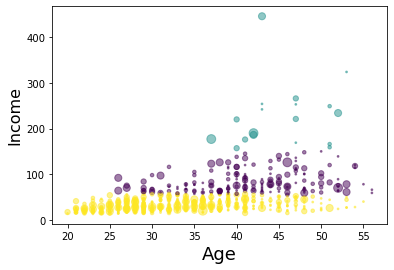

In [122]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

C:\Users\SPaswan\AppData\Local\Temp\ipykernel_1948\546968922.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\SPaswan\AppData\Local\Temp\ipykernel_1948\546968922.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


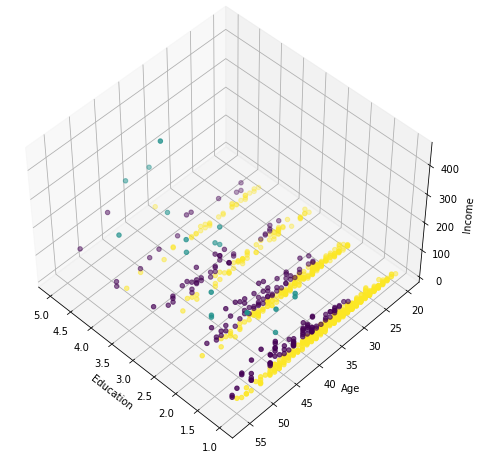

In [128]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster.
For example, the 3 clusters can be:

*   AFFLUENT, EDUCATED AND OLD AGED
*   MIDDLE AGED AND MIDDLE INCOME
*   YOUNG AND LOW INCOME
